<a href="https://colab.research.google.com/github/sudhanshu741/AI_Data_Analyst/blob/main/Fraud_Detection_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks that are needed to be performed:


1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Data Loading and Initial Exploration:




*   Load the data from the CSV file.
*   Get a summary of the dataset, including a look at missing values and overall structure.



In [2]:
df=pd.read_csv('/content/Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355422 entries, 0 to 355421
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            355422 non-null  int64  
 1   type            355422 non-null  object 
 2   amount          355422 non-null  float64
 3   nameOrig        355422 non-null  object 
 4   oldbalanceOrg   355422 non-null  float64
 5   newbalanceOrig  355421 non-null  float64
 6   nameDest        355421 non-null  object 
 7   oldbalanceDest  355421 non-null  float64
 8   newbalanceDest  355421 non-null  float64
 9   isFraud         355421 non-null  float64
 10  isFlaggedFraud  355421 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 29.8+ MB




> Proovides a statistical analysis of our dataset



In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,355422.000000,3.554220e+05,3.554220e+05,3.554210e+05,3.554210e+05,3.554210e+05,355421.000000,355421.0
mean,12.156546,1.744762e+05,8.909430e+05,9.101466e+05,9.840910e+05,1.191188e+06,0.000554,0.0
std,2.947187,2.920235e+05,2.912430e+06,2.949534e+06,2.366426e+06,2.573395e+06,0.023536,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,10.000000,1.317487e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,12.000000,8.048926e+04,1.776850e+04,0.000000e+00,9.965770e+04,2.072690e+05,0.000000,0.0
75%,15.000000,2.316858e+05,1.746710e+05,2.154246e+05,8.755708e+05,1.232563e+06,0.000000,0.0
max,17.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.138365e+07,4.148270e+07,1.000000,0.0






> Checks for any null values.




In [6]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


# Feature Engineering



> First, we create features that are necessary for detecting fraudulent transactions (like here, we create *balaanceOriginal_diff*  and *balanceDestination_diff* for knowing discrepancies between multiple transaction in our dataset.)

We also use labelEncoder in sklearn library to change our type feature to label 1,2,4,5 etc for better understanding.



In [7]:
Le= LabelEncoder()
df['balaanceOriginal_diff']=df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDestination_diff']=df['newbalanceDest']-df['oldbalanceDest']
df['type']=Le.fit_transform(df['type'])

In [8]:
df.size

4620486

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balaanceOriginal_diff,balanceDestination_diff
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,-9839.64,0.0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,-1864.28,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,-181.00,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,-181.00,-21182.0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,-11668.14,0.0


In the following block of code, we find the correlation matrix for our dataset to check for co-linearlity. Here, we use high_corr_threshold(0.9) to remove highly colinear points.

We drop high co-linear features and focus on others for optimized ML model.

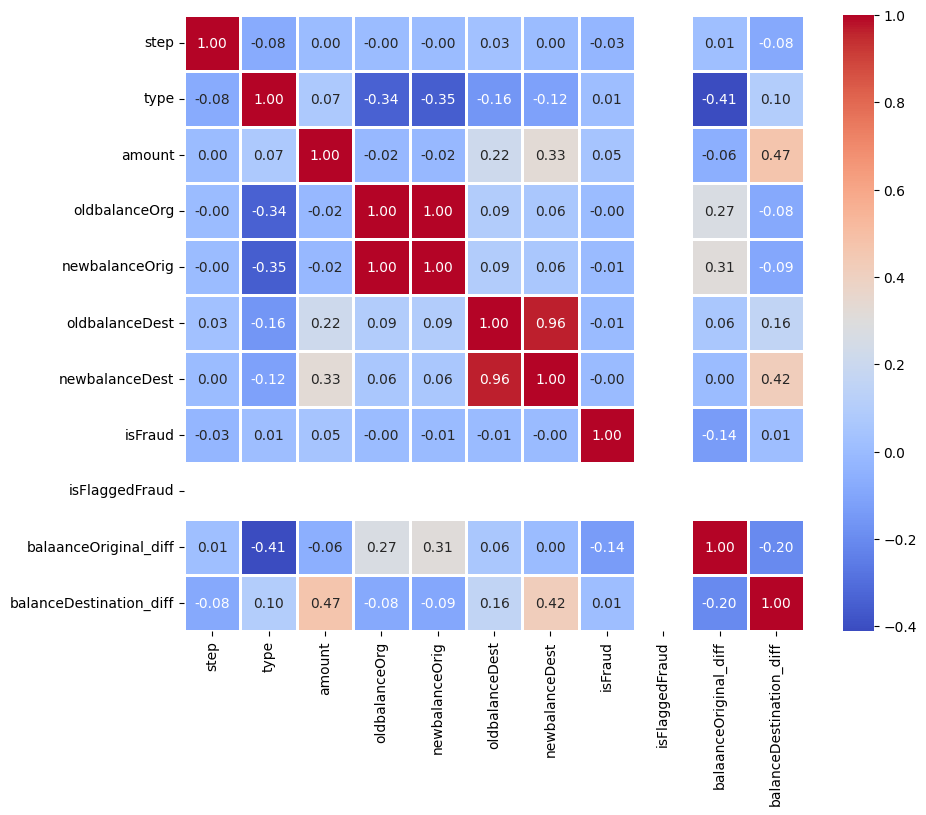

Dropping highly correlated features: {'oldbalanceDest', 'newbalanceOrig', 'oldbalanceOrg', 'newbalanceDest'}


In [10]:
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=2)
plt.show()

high_corr_threshold = 0.9
high_corr = np.where(np.abs(corr) > high_corr_threshold)

drop_features = set()
for i in range(len(high_corr[0])):
    if high_corr[0][i] != high_corr[1][i]:
        drop_features.add(corr.columns[high_corr[1][i]])

print("Dropping highly correlated features:", drop_features)

In the following code we split our dataset ito input feature(X) and output feature(y). X has all the feature leaving ['isFraud', 'nameOrig',
 'nameDest']  and y has ['isFraud'] .

In [11]:
X= df.drop(['isFraud','nameOrig','nameDest']+list(drop_features), axis=1)
y = df['isFraud'].fillna(df['isFraud'].mode()[0])

The obtained features are the split furrther into X_train,X_test,y_train,y_test, with 70% training data and 30% testing data.

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, stratify=y)

We use imputer to impute any null value that came in when afer removing co-linearity.

Then, we use RandomForestClassifier because it good performance in baseline comparisons, handling imbalance datasets, evaluate classifier robustness, and also the model behaviour

In [13]:
imputer=SimpleImputer(strategy='mean')
X_train_imputed=imputer.fit_transform(X_train)
X_test_imputed=imputer.transform(X_test)
forest=RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=42)
forest.fit(X_train_imputed, y_train)

y_pred= forest.predict(X_test_imputed)

In [14]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Feature Importance
importances = forest.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

Confusion Matrix:
 [[106567      1]
 [    34     25]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    106568
         1.0       0.96      0.42      0.59        59

    accuracy                           1.00    106627
   macro avg       0.98      0.71      0.79    106627
weighted avg       1.00      1.00      1.00    106627

ROC AUC Score: 0.7118597149397091
                   Feature  Importance
4    balaanceOriginal_diff    0.335220
5  balanceDestination_diff    0.295335
2                   amount    0.274390
0                     step    0.062908
1                     type    0.032146
3           isFlaggedFraud    0.000000


From the above, data we can conclude that:


> 106,567 - These are the transactions that were correctly predicted as non-fraudulent (class 0).

> This represents a transaction that was wrongly predicted as fraudulent but was actually non-fraudulent.

> 34 - These are fraudulent transactions (class 1) that were not caught by the model and were predicted as non-fraudulent.

> 25 - These are fraudulent transactions that were correctly predicted as such.

```
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    106568
         1.0       0.96      0.42      0.59        59

```
> Class 0 (Non-Fraudulent Transactions):

* Precision: 1.00, indicating the model almost never classifies a non-fraudulent transaction as fraudulent.

* Recall: 1.00, meaning the model successfully identifies all non-fraudulent transactions.
* F1-score: 1.00, balancing precision and recall, confirms excellent performance for non-fraudulent transactions.

> Class 1 (Fraudulent Transactions):

* Precision: 0.96, suggesting that most of the transactions classified as fraudulent were indeed fraudulent.
*Recall: 0.42, highlighting that only 42% of actual fraudulent transactions were caught by the model.
*F1-score: 0.59, which reflects the imbalance between precision and recall for fraudulent transactions.

The overall accuracy of the model is very high at 1.00, but this alone does not represent how well the model performs for minority classes, especially fraudulent transactions.

* Macro Average:
 * Precision:0.98, Recall: 0.71, F1-Score: 0.79 — This shows that the model
   performs well for class 0 but could improve for class 1.
* Weighted Average:
  These values, all being close to 1.00, indicate that the model performs well when considering the large number of non-fraudulent transactions.
> ROC AUC Score:
* The ROC AUC score is 0.7119, suggesting that the model has a moderate ability to distinguish between fraudulent and non-fraudulent transactions. An AUC score closer to 1.00 indicates better discriminatory power, while a score of 0.7119 shows room for improvement in detecting fraudulent transactions.

> Feature Importance Analysis:
* The importance of the features used in the model helps us understand which variables have the most impact on predicting fraud.

> Feature Importance Analysis:
* The importance of the features used in the model helps us understand which variables have the most impact on predicting fraud.



```
                   Feature    Importance
4    balaanceOriginal_diff    0.335220
5  balanceDestination_diff    0.295335
2                   amount    0.274390
0                     step    0.062908
1                     type    0.032146
3           isFlaggedFraud    0.000000
```


                   
* balanceOriginal_diff (33.52% importance): This feature is the most influential in determining fraud. It may represent the difference in balance from the original transaction, showing its relevance to detecting fraud.
* **balanceDestination_diff (29.53% importance)**: Another key feature, likely representing the balance difference at the destination of the transaction. Significant changes here could indicate fraudulent activity.
* **amount (27.44% importance)**: The transaction amount plays a critical role in identifying suspicious transactions.
* **step (6.29% importance)**: Time steps or sequential data might have a moderate influence on the prediction.
* **type (3.21% importance)**: The type of transaction holds minor significance in the fraud prediction process.
* **isFlaggedFraud (0.00% importance)**: This feature appears to have no impact, possibly because it is rarely triggered in the dataset or correlates poorly with fraud.



> **Summary**
* The model shows excellent performance in identifying non-fraudulent transactions, with very high precision, recall, and F1-scores. However, it struggles with detecting fraudulent transactions, with a recall of only 42%, which means that a significant portion of fraud cases is missed.
* Feature importance indicates that the model relies heavily on the balance differences and the transaction amount for its predictions. Improving feature engineering or model tuning could enhance the detection of fraudulent transactions, particularly boosting recall for class 1.
* In summary, while the model performs well overall, further improvements are necessary to more effectively catch fraudulent transactions, as evidenced by the relatively low recall and moderate ROC AUC score.
